In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\data science\partice_projects\machin learning projects\linear regression\forest fire\Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.iloc[122]

day            NaN
month          NaN
year           NaN
Temperature    NaN
 RH            NaN
 Ws            NaN
Rain           NaN
FFMC           NaN
DMC            NaN
DC             NaN
ISI            NaN
BUI            NaN
FWI            NaN
Classes        NaN
Name: 122, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
df.isnull().sum().sum()

28

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [9]:
df['Region']=df['Region'].astype(int)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.5+ KB


In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
df=df.drop(124).reset_index(drop=True)

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [18]:
df[['day'	,'month'	,'year'	,'Temperature'	,'RH',	'Ws']]=df[['day'	,'month'	,'year'	,'Temperature'	,'RH',	'Ws']].astype(int)

In [19]:
for i in df.columns:
    if df[i].dtypes == 'object' and i != 'Classes':
        df[i] = df[i].astype(float)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [21]:
#df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

#### Exploratory data analysis

In [23]:
df.drop(columns=['day','month','year'],inplace=True)

In [24]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [26]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [27]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [29]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [30]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


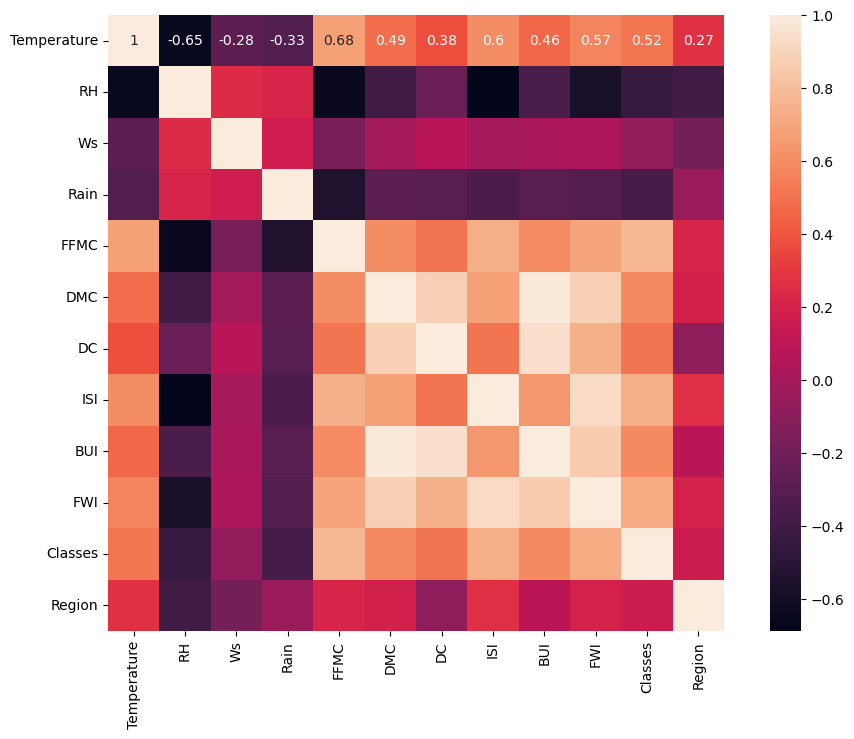

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, square=True)
plt.show()

In [47]:
x=df.drop(columns='FWI')
y=df['FWI']

In [54]:
corelated=x.corr()

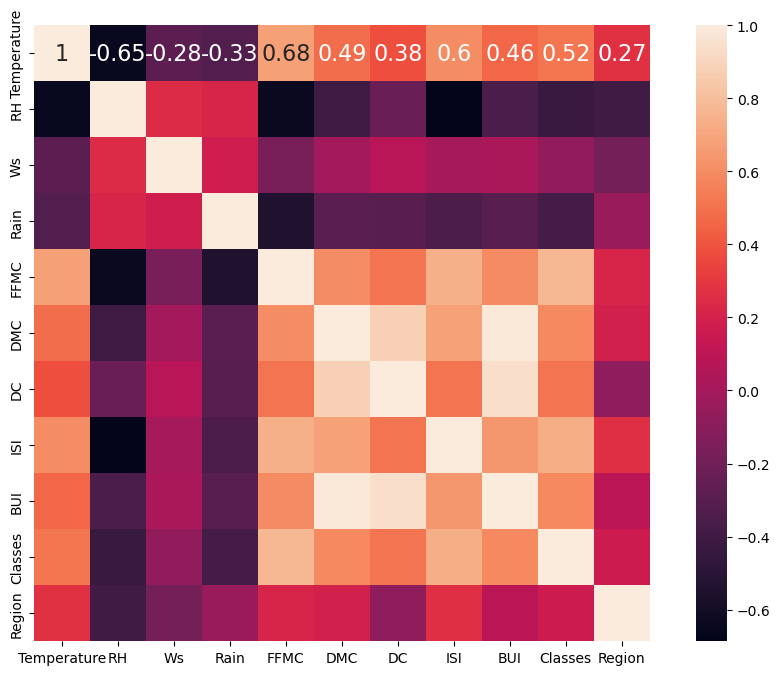

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(corelated, annot=True, square=True,annot_kws={"size":16})
plt.show()

In [69]:
corelated

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


In [73]:
def corelation(data,thershold):
    corr=set()
    data_matrix=data.corr()
    for i in range(len(data_matrix.columns)):
        for j in range(i):
            if abs(data_matrix.iloc[i,j]>thershold):
                colname=data_matrix.columns[i]
                corr.add(colname)
    return corr
            

In [75]:
features=corelation(x,0.85)
features

{'BUI', 'DC'}

In [76]:
x.drop(columns=['BUI','DC'],inplace=True)
x.shape

(243, 9)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [81]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((162, 9), (81, 9), (162,), (81,))

In [80]:
x_train.shape

(162, 9)

## Scalaing data

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Text(0.5, 1.0, 'After scale')

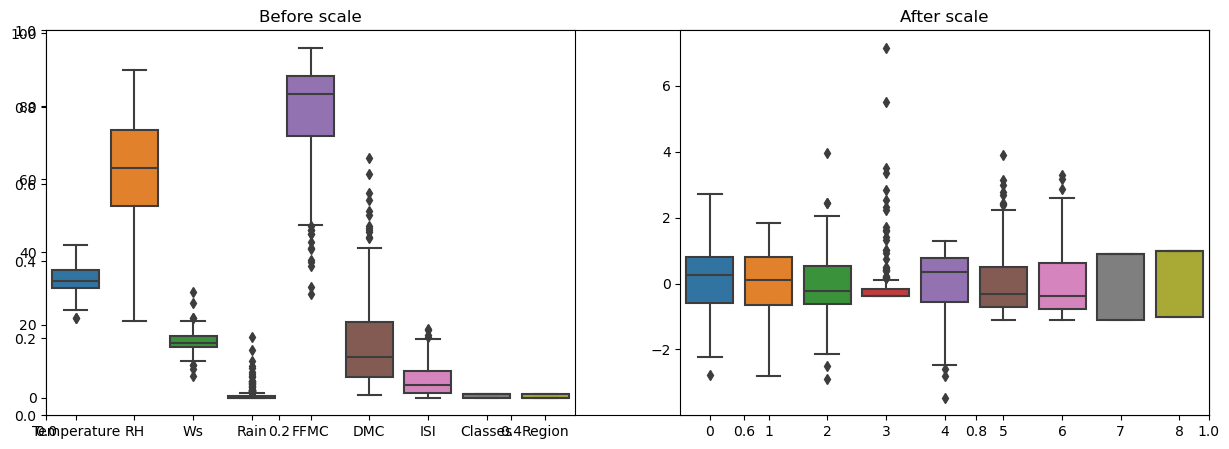

In [90]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x)
plt.title('Before scale')
plt.subplot(1,2,2)
sns.boxplot(x_train)
plt.title('After scale')

## Linear Regresssion

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('the r2_score=',score*100)
print('the mae=',mae*100)

the r2_score= 98.45563190792225
the mae= 57.67877823415978


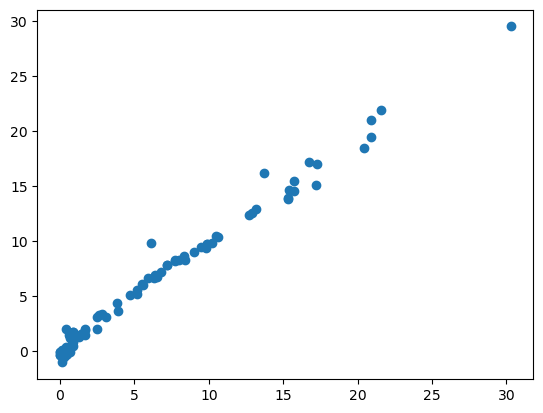

In [99]:
plt.scatter(y_test,y_pred)

## lasso Regeression 

In [101]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('the r2_score=',score*100)
print('the mae=',mae)

the r2_score= 95.14102148198663
the mae= 1.1053469612945108


## lasso cross validation

In [102]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error
lassocv=LassoCV(cv=5)
lassocv.fit(x_train,y_train)
y_pred=lassocv.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('the r2_score=',score*100)
print('the mae=',mae)

the r2_score= 98.3629786213086
the mae= 0.6041813665539069


# Ridge regession

In [103]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('the r2_score=',score*100)
print('the mae=',mae)

the r2_score= 98.39564989246833
the mae= 0.5953582907340879


### Ridge ression cross validation

In [104]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred=ridgecv.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('the r2_score=',score*100)
print('the mae=',mae)

the r2_score= 98.39564989246833
the mae= 0.5953582907340879


In [106]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('the r2_score=',score*100)
print('the mae=',mae)